<a href="https://colab.research.google.com/github/MorganHarrison4/R-Code-Data-Analytics-1/blob/master/2MORGAN_Reduced_Project_Deliverable_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT DELIVERABLE II**

# **Uploading data**

**Importing libraries**

In [ ]:
from sklearn.datasets import load_digits
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from google.colab import files
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import io
from collections import Counter
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [ ]:
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
uploaded = files.upload()

In [ ]:
df1 = pd.read_csv("Flowdata1.csv")
df1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,158776,8,5,493,3533,191,0,61.625000,78.770802,...,20,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN
1,389,456,10,4,165,326,79,0,16.500000,33.012624,...,32,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN
2,80,32368538,7,7,432,1389,432,0,61.714286,163.280652,...,32,120150.33330,52427.28445,180688,89766,1.000000e+07,13501.460620,10000000,9996190,BENIGN
3,443,3391963,11,11,999,3950,267,0,90.818182,96.624860,...,32,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN
4,53,60559,1,1,64,117,64,64,64.000000,0.000000,...,20,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298754,443,194474,34,40,871,64624,389,0,25.617647,81.402857,...,32,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN
298755,80,46092941,8,9,461,2149,457,0,57.625000,161.372628,...,20,42679.75000,33231.66373,92319,21870,9.995370e+06,3530.318635,9998725,9991910,BENIGN
298756,443,65072602,12,13,3226,635,2652,0,268.833333,764.897121,...,20,37948.83333,37551.51029,114600,22492,9.997484e+06,25981.318330,10000000,9955973,BENIGN
298757,53,221,2,2,80,272,40,40,40.000000,0.000000,...,32,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN


In [ ]:
df2 = pd.read_csv("Flowdata2.csv")
df2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,23831,1,1,0,0,0,0,0.000000,0.000000,...,32.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN
1,80,16406177,5,7,730,11595,365,0,146.000000,199.918734,...,32.0,0.00,0.000000,0.0,0.0,16000000.0,0.000000,16000000.0,16000000.0,DoS Hulk
2,80,45879923,6,5,36,0,6,6,6.000000,0.000000,...,20.0,23775.25,61.424072,23840.0,23692.0,9991467.5,59.050826,9991546.0,9991403.0,BENIGN
3,80,85057374,12,7,1695,11595,339,0,141.250000,174.560812,...,32.0,983.00,0.000000,983.0,983.0,83300000.0,0.000000,83300000.0,83300000.0,DoS Hulk
4,53,43444670,2,2,110,229,63,47,55.000000,11.313709,...,32.0,672.00,0.000000,672.0,672.0,43400000.0,0.000000,43400000.0,43400000.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430867,80,98494654,7,6,319,11595,313,0,45.571429,117.946114,...,20.0,1999.00,0.000000,1999.0,1999.0,98500000.0,0.000000,98500000.0,98500000.0,DoS Hulk
430868,47028,97444516,7,5,11595,354,5792,0,1656.428571,2429.118623,...,32.0,12953.00,0.000000,12953.0,12953.0,97400000.0,0.000000,97400000.0,97400000.0,BENIGN
430869,53,72315,4,2,136,300,34,34,34.000000,0.000000,...,32.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN
430870,80,11979,3,1,18,0,6,6,6.000000,0.000000,...,20.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,DoS Hulk


As we were given two training data set with the exact variables, we decided to concatenate the two data frames vertically to create a new data frame:

In [ ]:
df=pd.concat([df1, df2])
data = df
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,158776,8,5,493,3533,191,0,61.625000,78.770802,...,20.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN
1,389,456,10,4,165,326,79,0,16.500000,33.012624,...,32.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN
2,80,32368538,7,7,432,1389,432,0,61.714286,163.280652,...,32.0,120150.3333,52427.28445,180688.0,89766.0,10000000.0,13501.46062,10000000.0,9996190.0,BENIGN
3,443,3391963,11,11,999,3950,267,0,90.818182,96.624860,...,32.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN
4,53,60559,1,1,64,117,64,64,64.000000,0.000000,...,20.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430867,80,98494654,7,6,319,11595,313,0,45.571429,117.946114,...,20.0,1999.0000,0.00000,1999.0,1999.0,98500000.0,0.00000,98500000.0,98500000.0,DoS Hulk
430868,47028,97444516,7,5,11595,354,5792,0,1656.428571,2429.118623,...,32.0,12953.0000,0.00000,12953.0,12953.0,97400000.0,0.00000,97400000.0,97400000.0,BENIGN
430869,53,72315,4,2,136,300,34,34,34.000000,0.000000,...,32.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN
430870,80,11979,3,1,18,0,6,6,6.000000,0.000000,...,20.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,DoS Hulk


**Data preprocessing (except scaling)**

As our training data set presented NaN values, we remove rows or columns that contain missing or undefined data. As well, we remove the Index column to have the exact 79 columns we had before in our concatenate table:

In [ ]:
data.dropna(inplace=True)

In [ ]:
data = data.reset_index(drop = True)
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,158776,8,5,493,3533,191,0,61.625000,78.770802,...,20.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN
1,389,456,10,4,165,326,79,0,16.500000,33.012624,...,32.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN
2,80,32368538,7,7,432,1389,432,0,61.714286,163.280652,...,32.0,120150.3333,52427.28445,180688.0,89766.0,10000000.0,13501.46062,10000000.0,9996190.0,BENIGN
3,443,3391963,11,11,999,3950,267,0,90.818182,96.624860,...,32.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN
4,53,60559,1,1,64,117,64,64,64.000000,0.000000,...,20.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728861,53,131469,2,2,82,238,41,41,41.000000,0.000000,...,20.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN
728862,80,98494654,7,6,319,11595,313,0,45.571429,117.946114,...,20.0,1999.0000,0.00000,1999.0,1999.0,98500000.0,0.00000,98500000.0,98500000.0,DoS Hulk
728863,47028,97444516,7,5,11595,354,5792,0,1656.428571,2429.118623,...,32.0,12953.0000,0.00000,12953.0,12953.0,97400000.0,0.00000,97400000.0,97400000.0,BENIGN
728864,53,72315,4,2,136,300,34,34,34.000000,0.000000,...,32.0,0.0000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,BENIGN


In [ ]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

We search for the exact columns that only contain NaN values, and print them. In this way, we identify them to remove them from our data set:

In [ ]:
for NaN_columns in data.columns:
  if all([ value == 0 for value in data[NaN_columns]  ]) :
    print(NaN_columns)

 Bwd PSH Flags
 Fwd URG Flags
 Bwd URG Flags
 CWE Flag Count
Fwd Avg Bytes/Bulk
 Fwd Avg Packets/Bulk
 Fwd Avg Bulk Rate
 Bwd Avg Bytes/Bulk
 Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate


In [ ]:
data=data.drop(' Bwd PSH Flags',axis=1)
data=data.drop(' Fwd URG Flags',axis=1)
data=data.drop(' Bwd URG Flags',axis=1)
data=data.drop(' CWE Flag Count',axis=1)
data=data.drop('Fwd Avg Bytes/Bulk',axis=1)
data=data.drop(' Fwd Avg Packets/Bulk',axis=1)
data=data.drop(' Fwd Avg Bulk Rate',axis=1)
data=data.drop(' Bwd Avg Bytes/Bulk',axis=1)
data=data.drop(' Bwd Avg Packets/Bulk',axis=1)
data=data.drop('Bwd Avg Bulk Rate',axis=1)

In [ ]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count',

We verify that we don't have any NaN values in our data set by counting them:

In [ ]:
nan_count = data.isna().sum().sum()
print(nan_count)

0


As our training data set presented infinity values, we remove them by replacing them with zeros:

In [ ]:
def clean_dataset(data):
  assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
  data.dropna(inplace=True)
  indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(axis=1)
  return data[indices_to_keep]

In [ ]:
data_clean=clean_dataset(data)

In [ ]:
data_clean.corr()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.190176,-0.004031,-0.003834,0.003279,-0.003023,-0.004302,-0.121424,0.042322,0.029373,...,-0.002708,0.000959,-0.048105,-0.042302,-0.058051,-0.037042,-0.155349,-0.033095,-0.156870,-0.152599
Flow Duration,-0.190176,1.000000,0.017823,0.016727,0.081477,0.014425,0.318528,-0.175090,0.144506,0.306176,...,0.012230,-0.000275,0.143700,0.213911,0.239724,0.075057,0.826092,0.187989,0.834965,0.810293
Total Fwd Packets,-0.004031,0.017823,1.000000,0.999584,0.485026,0.998055,0.010243,-0.003834,-0.000338,0.001536,...,0.784602,-0.000133,0.009585,0.006739,0.010404,0.007834,-0.000320,0.000815,-0.000232,-0.000425
Total Backward Packets,-0.003834,0.016727,0.999584,1.000000,0.482849,0.997817,0.009678,-0.003459,-0.000867,0.000970,...,0.781908,0.000023,0.008782,0.005109,0.008879,0.007913,-0.000726,0.000441,-0.000689,-0.000791
Total Length of Fwd Packets,0.003279,0.081477,0.485026,0.482849,1.000000,0.470939,0.349751,-0.007688,0.303540,0.273160,...,0.603871,-0.001190,0.131608,0.145956,0.175215,0.078991,0.020905,0.013295,0.022294,0.019348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,-0.037042,0.075057,0.007834,0.007913,0.078991,0.005784,0.062153,-0.031730,0.024651,0.044075,...,0.004110,0.000304,0.895857,0.017995,0.564618,1.000000,0.031681,0.108725,0.044933,0.020781
Idle Mean,-0.155349,0.826092,-0.000320,-0.000726,0.020905,-0.000728,0.211939,-0.141988,0.124632,0.244348,...,-0.000907,0.000292,0.032611,0.007104,0.016190,0.031681,1.000000,0.080603,0.995784,0.996474
Idle Std,-0.033095,0.187989,0.000815,0.000441,0.013295,0.000133,0.028773,-0.028466,0.017373,0.027644,...,0.000398,-0.008723,0.167487,0.155008,0.152196,0.108725,0.080603,1.000000,0.168037,-0.002606
Idle Max,-0.156870,0.834965,-0.000232,-0.000689,0.022294,-0.000718,0.211940,-0.143268,0.125536,0.244053,...,-0.000851,-0.000414,0.056313,0.033045,0.038904,0.044933,0.995784,0.168037,1.000000,0.984935


The following operations will be made using the data_clean data set

# **Data Visualization**

In [ ]:
## Splitting dataset into features and response values
X = data_clean.loc[:,data_clean.columns!= 'Label'] # Features
y = data_clean.Label # Target Values

**Bar plot**

In [ ]:
z=Counter(y)
z

Counter({'BENIGN': 562711,
         'SSH-Patator': 3951,
         'FTP-Patator': 5317,
         'DoS Hulk': 143221,
         'DoS GoldenEye': 6416,
         'DoS Slowhttptest': 3427,
         'DoS slowloris': 3611,
         'Heartbleed': 8})

In [ ]:
count=[z['BENIGN'],z['SSH-Patator'],z['FTP-Patator'],z['DoS Hulk'],z['DoS GoldenEye'],z['DoS Slowhttptest'],z['DoS slowloris'],z['Heartbleed']]
print(count)

[562711, 3951, 5317, 143221, 6416, 3427, 3611, 8]


In [ ]:
labelsg=['BENIGN','SSH-Patator','FTP-Patator','DoS Hulk','DoS GoldenEye','DoS Slowhttptest','DoS slowloris','Heartbleed']

<BarContainer object of 8 artists>

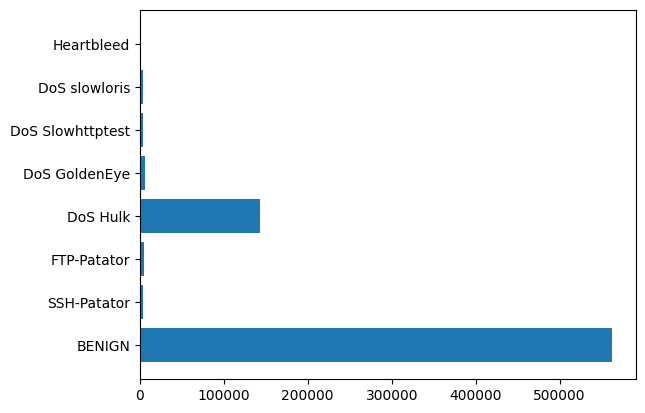

In [ ]:
plt.barh(labelsg,count)

**Pie chart**

([<matplotlib.patches.Wedge at 0x7fc107e8b400>,
 [Text(-0.8302490445883534, 0.7215861168011249, 'BENIGN'),
  Text(0.17182924829000554, -1.0864965298757707, 'SSH-Patator'),
  Text(0.21509536734911386, -1.078765026752791, 'FTP-Patator'),
  Text(0.8170661611149336, -0.7364800665061516, 'DoS Hulk'),
  Text(1.0957029226855808, -0.09713446977400089, 'DoS GoldenEye'),
  Text(1.0988373363992285, -0.05056192376728866, 'DoS Slowhttptest'),
  Text(1.0998655091837766, -0.017200631032372172, 'DoS slowloris'),
  Text(1.099999999348262, -3.786586525816511e-05, 'Heartbleed')],
 [Text(-0.4528631152300109, 0.3935924273460681, '77.2%'),
  Text(0.09372504452182119, -0.5926344708413295, '0.5%'),
  Text(0.11732474582678937, -0.5884172873197041, '0.7%'),
  Text(0.4456724515172365, -0.4017163999124463, '19.7%'),
  Text(0.5976561396466804, -0.05298243805854593, '0.9%'),
  Text(0.5993658198541245, -0.027579231145793814, '0.5%'),
  Text(0.599926641372969, -0.00938216238129391, '0.5%'),
  Text(0.5999999996445065,

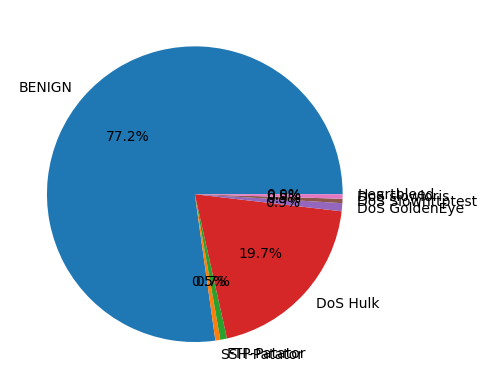

In [ ]:
plt.pie(count,labels=labelsg, autopct='%1.1f%%')

**Correlation Plot**

In [ ]:
correlation_matrix=data_clean.corr()

In [ ]:
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.190176,-0.004031,-0.003834,0.003279,-0.003023,-0.004302,-0.121424,0.042322,0.029373,-0.206603,-0.225673,-0.229180,-0.190077,0.074144,0.194282,-0.126493,-0.158378,-0.161505,-0.021389,-0.188113,-0.127833,-0.148749,-0.160569,-0.047550,-0.125538,-0.078078,-0.070800,-0.088239,-0.047033,0.206792,0.000542,0.000887,0.177788,0.168995,-0.213027,-0.179429,-0.194450,-0.177653,-0.129536,-0.056164,0.206792,-0.006818,-0.191316,0.484554,0.497005,-0.006626,-0.038964,-0.195844,0.042322,-0.229180,0.000542,-0.004031,0.003279,-0.003834,-0.003023,-0.106579,0.239923,-0.002708,0.000959,-0.048105,-0.042302,-0.058051,-0.037042,-0.155349,-0.033095,-0.156870,-0.152599
Flow Duration,-0.190176,1.000000,0.017823,0.016727,0.081477,0.014425,0.318528,-0.175090,0.144506,0.306176,0.664955,-0.277034,0.638735,0.636314,-0.031568,-0.154810,0.581025,0.805280,0.838231,0.056641,0.999056,0.603411,0.791070,0.838045,0.174593,0.740258,0.403230,0.511132,0.558734,0.179049,-0.046909,0.000689,-0.001088,-0.148117,-0.078522,-0.276808,0.675786,0.615870,0.659789,0.544055,0.282610,-0.046909,0.005582,0.178264,0.047291,-0.157234,0.005530,-0.163772,0.602347,0.144506,0.638735,0.000689,0.017823,0.081477,0.016727,0.014425,0.062731,-0.051935,0.012230,-0.000275,0.143700,0.213911,0.239724,0.075057,0.826092,0.187989,0.834965,0.810293
Total Fwd Packets,-0.004031,0.017823,1.000000,0.999584,0.485026,0.998055,0.010243,-0.003834,-0.000338,0.001536,0.022902,-0.005751,0.019520,0.005612,0.000384,-0.002829,-0.001677,-0.001527,0.000124,-0.000606,0.017744,-0.001756,-0.001163,0.000047,-0.001248,0.022326,-0.001030,-0.000287,0.001232,-0.001058,0.003850,0.000109,0.008882,-0.002726,-0.001273,-0.006126,0.022768,0.023853,0.011615,0.006428,-0.001893,0.003850,0.000091,0.008016,0.001581,-0.003487,0.000090,0.003000,0.021825,-0.000338,0.019520,0.000109,1.000000,0.485026,0.999584,0.998043,0.003853,-0.000678,0.784602,-0.000133,0.009585,0.006739,0.010404,0.007834,-0.000320,0.000815,-0.000232,-0.000425
Total Backward Packets,-0.003834,0.016727,0.999584,1.000000,0.482849,0.997817,0.009678,-0.003459,-0.000867,0.000970,0.022583,-0.004987,0.019430,0.005138,0.000317,-0.002951,-0.002004,-0.001973,-0.000346,-0.000627,0.016641,-0.001916,-0.001601,-0.000430,-0.001121,0.021794,-0.001205,-0.000411,0.001288,-0.001057,0.003691,0.000460,0.008885,-0.002878,-0.001018,-0.005506,0.022371,0.024054,0.011274,0.006147,-0.001677,0.003691,0.000014,0.007357,0.001299,-0.002978,0.000014,0.005304,0.022034,-0.000867,0.019430,0.000460,0.999584,0.482849,1.000000,0.997813,0.003527,-0.000636,0.781908,0.000023,0.008782,0.005109,0.008879,0.007913,-0.000726,0.000441,-0.000689,-0.000791
Total Length of Fwd Packets,0.003279,0.081477,0.485026,0.482849,1.000000,0.470939,0.349751,-0.007688,0.303540,0.273160,0.037143,-0.038477,0.030084,0.019071,0.004997,-0.021822,0.002775,0.013244,0.023748,-0.004608,0.080442,0.002325,0.0

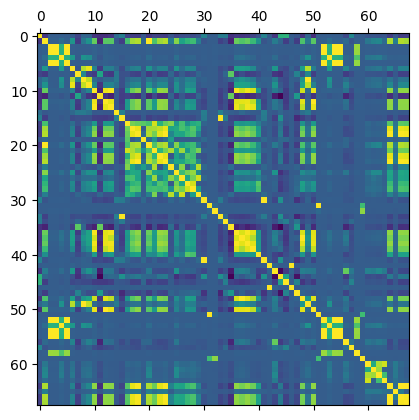

In [ ]:
plt.matshow(correlation_matrix)

We found the pairs of columns that are highly correlated, with each pair appearing only once in the list. From this list, we develop a correlation matrix where the subset includes only the rows and columns that are involved in highly correlated pairs. This correlation matrix will allow us to analyze the most important relationships and reduce visual clutter:

In [ ]:
pairplot_correlated_data = []
correlated_pairs = [] 
rows_with_correlated_pairs = []
columns_with_correlated_pairs = []
correlation_matrix.index
for columns in correlation_matrix.index:
  counter=0
  for content in correlation_matrix[columns]:
    if(content>=0.9) or (content<=-0.9):
      if correlation_matrix.index[counter] not in pairplot_correlated_data:
        pairplot_correlated_data.append(correlation_matrix.index[counter])
      if columns not in pairplot_correlated_data:
        pairplot_correlated_data.append(columns)
      if [correlation_matrix.index[counter],columns] not in correlated_pairs and [columns,correlation_matrix.index[counter]] not in correlated_pairs and correlation_matrix.index[counter] != columns:
        correlated_pairs.append([correlation_matrix.index[counter],columns])
        if correlation_matrix.index[counter] not in rows_with_correlated_pairs:
          rows_with_correlated_pairs.append(correlation_matrix.index[counter])
        if columns not in columns_with_correlated_pairs:
          columns_with_correlated_pairs.append(columns)
    counter = counter + 1
print(correlated_pairs)
print(pairplot_correlated_data)

[['Fwd IAT Total', ' Flow Duration'], [' Total Backward Packets', ' Total Fwd Packets'], [' Total Length of Bwd Packets', ' Total Fwd Packets'], ['Subflow Fwd Packets', ' Total Fwd Packets'], [' Subflow Bwd Packets', ' Total Fwd Packets'], [' Subflow Bwd Bytes', ' Total Fwd Packets'], [' Total Length of Bwd Packets', ' Total Backward Packets'], ['Subflow Fwd Packets', ' Total Backward Packets'], [' Subflow Bwd Packets', ' Total Backward Packets'], [' Subflow Bwd Bytes', ' Total Backward Packets'], [' Subflow Fwd Bytes', 'Total Length of Fwd Packets'], ['Subflow Fwd Packets', ' Total Length of Bwd Packets'], [' Subflow Bwd Packets', ' Total Length of Bwd Packets'], [' Subflow Bwd Bytes', ' Total Length of Bwd Packets'], [' Fwd Packet Length Std', ' Fwd Packet Length Max'], [' Avg Fwd Segment Size', ' Fwd Packet Length Mean'], [' Bwd Packet Length Mean', 'Bwd Packet Length Max'], [' Bwd Packet Length Std', 'Bwd Packet Length Max'], [' Max Packet Length', 'Bwd Packet Length Max'], [' Pack

In [ ]:
correlation_matrix_with_correlated_pairs=correlation_matrix[columns_with_correlated_pairs].loc[rows_with_correlated_pairs].style.background_gradient(cmap='coolwarm')
correlation_matrix_with_correlated_pairs

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Fwd IAT Std,Fwd IAT Max,Bwd IAT Std,Fwd PSH Flags,Fwd Header Length,Max Packet Length,Packet Length Mean,Packet Length Std,RST Flag Count,Average Packet Size,Subflow Fwd Packets,Subflow Bwd Packets,Idle Mean,Idle Max
Fwd IAT Total,0.999056,0.017744,0.016641,0.080442,0.014379,0.313675,0.141752,0.662451,0.636629,0.634005,-0.152970,0.581210,0.805879,0.838907,0.792879,0.840118,0.509716,-0.045671,0.000677,0.673158,0.613145,0.657263,0.005269,0.599863,0.017744,0.016641,0.827360,0.836178
Total Backward Packets,0.016727,0.999584,1.000000,0.482849,0.997817,0.009678,-0.000867,0.022583,0.019430,0.005138,-0.002951,-0.002004,-0.001973,-0.000346,-0.001601,-0.000430,-0.000411,0.003691,0.000460,0.022371,0.024054,0.011274,0.000014,0.022034,0.999584,1.000000,-0.000726,-0.000689
Total Length of Bwd Packets,0.014425,0.998055,0.997817,0.470939,1.000000,0.007106,-0.001928,0.022200,0.018898,0.005175,-0.002149,-0.001783,-0.001730,-0.000399,-0.001370,-0.000467,-0.000869,0.003653,0.000454,0.021777,0.022910,0.010857,-0.000047,0.021052,0.998055,0.997817,-0.000728,-0.000718
Subflow Fwd Packets,0.017823,1.000000,0.999584,0.485026,0.998055,0.010243,-0.000338,0.022902,0.019520,0.005612,-0.002829,-0.001677,-0.001527,0.000124,-0.001163,0.000047,-0.000287,0.003850,0.000109,0.022768,0.023853,0.011615,0.000091,0.021825,1.000000,0.999584,-0.000320,-0.000232
Subflow Bwd Packets,0.016727,0.999584,1.000000,0.482849,0.997817,0.009678,-0.000867,0.022583,0.019430,0.005138,-0.002951,-0.002004,-0.001973,-0.000346,-0.001601,-0.000430,-0.000411,0.003691,0.000460,0.022371,0.024054,0.011274,0.000014,0.022034,0.999584,1.000000,-0.000726,-0.000689
Subflow Bwd Bytes,0.014425,0.998043,0.997813,0.470888,1.000000,0.007108,-0.001928,0.022201,0.018898,0.005175,-0.002149,-0.001783,-0.001730,-0.000399,-0.001370,-0.000467,-0.000869,0.003649,0.000454,0.021778,0.022910,0.010857,-0.000047,0.021052,0.998043,0.997813,-0.000728,-0.000718
Subflow Fwd Bytes,0.081477,0.485026,0.482849,1.000000,0.470939,0.349751,0.303540,0.037143,0.030084,0.019071,-0.021822,0.002775,0.013244,0.023748,0.017246,0.023172,0.037725,0.008916,-0.002693,0.101616,0.112836,0.075871,0.008392,0.106484,0.485026,0.482849,0.020905,0.022294
Fwd Packet Length Std,0.306176,0.001536,0.000970,0.273160,-0.000700,0.954630,0.864558,0.227765,0.205942,0.221336,-0.074298,0.111064,0.218964,0.246933,0.254661,0.244391,0.281234,0.007365,0.000585,0.396808,0.405802,0.395118,0.026072,0.403864,0.001536,0.000970,0.244348,0.244053
Avg Fwd Segment Size,0.144506,-0.000338,-0.000867,0.303540,-0.001928,0.839678,1.000000,0.068934,0.058640,0.066565,-0.074001,0.055480,0.114000,0.127640,0.127302,0.126040,0.211228,0.027077,-0.000115,0.239375,0.316494,0.246080,0.020726,0.327301,-0.000338,-0.000867,0.124632,0.125536
Bwd Packet Length Mean,0.638735,0.019520,0.019430,0.030084,0.018898,0.185711,0.058640,0.958893,1.000000,0.944770,-0.167846,0.336370,0.672181,0.757372,0.772359,0.755932,0.325486,-0.123755,0.001013,0.936596,0.941082,0.953094,0.004350,0.934703,0.019520,0.019430,0.762899,0.759246


**Heatmap**

<Axes: >

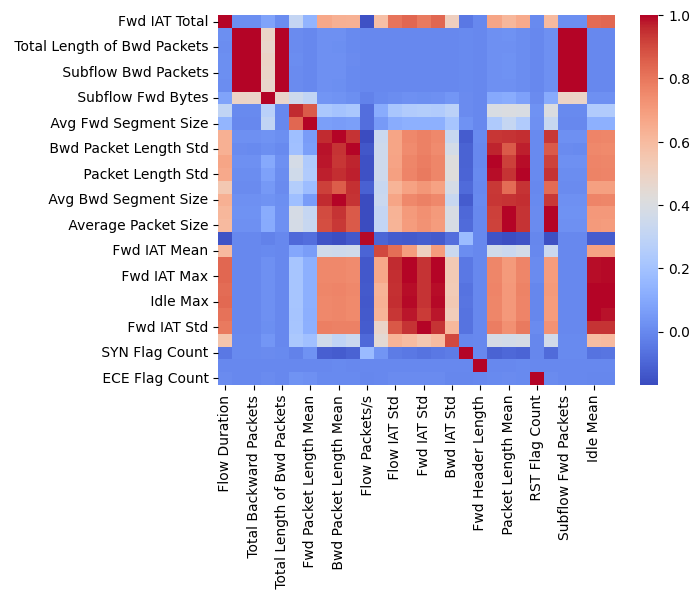

In [ ]:
correlation_visualization=correlation_matrix[columns_with_correlated_pairs].loc[rows_with_correlated_pairs]
sns.heatmap(correlation_visualization, cmap='coolwarm')

**Pairplot**

In [ ]:
df_subset = correlation_matrix[pairplot_correlated_data]
sns.set(font_scale=1.5)
sns.pairplot(df_subset)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f4308c71940> (for post_execute):


KeyboardInterrupt: ignored

# **Data scaling**

From the previous deliverable, we concluded that the best technique is Min-Max Scaler, providing the highest accuracy, thus we used only this method for this deliverable.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)

# **Logistic Regression**

In [ ]:
## Splitting the data into Train and Test sets
X_train,X_test,y_train,y_test=train_test_split(normalized_data,y,test_size=0.20,random_state=0) #0.20 chosen 

In [ ]:
# Logistic regression
logreg= LogisticRegression(penalty = "l2", solver = 'sag', max_iter = 100, multi_class = 'auto')

In [ ]:
## Stratified K-Fold CV
stratifiedkf = StratifiedKFold(n_splits=8) #10 fold crossvalidation was chosen because it requires the smallest computational complexity
score= cross_val_score(logreg,normalized_data,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.9596875  0.96074808 0.95958206 0.95977108 0.96546256 0.96634464
 0.96433897 0.9647275 ]
Average Cross Validation score :0.9625827989662233


Average accuracy = 0.96

**Model fitting**

In [ ]:
## Fitting the data into the model
logreg.fit(X_train,y_train)

LogisticRegression(solver='sag')

**Prediction**

In [ ]:
## Predicting y values for testing data
y_pred=logreg.predict(X_test)

**Confusion Matrix**

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[114312,     60,   2283,     60,      0,      2,      0,      1],
       [   209,   1229,      0,      0,      1,      0,      0,      0],
       [  1108,      4,  29748,      0,      4,      0,      0,      0],
       [   124,      0,     13,    559,     18,      0,      0,      0],
       [   381,      0,      2,     14,    418,      0,      0,      0],
       [   533,      0,      2,      0,      0,    506,      0,      0],
       [     2,      0,      1,      0,      0,      0,      0,      0],
       [   775,      0,      0,      0,      0,      0,      0,      0]])

Text(0.5, 427.9555555555555, 'Predicted label')

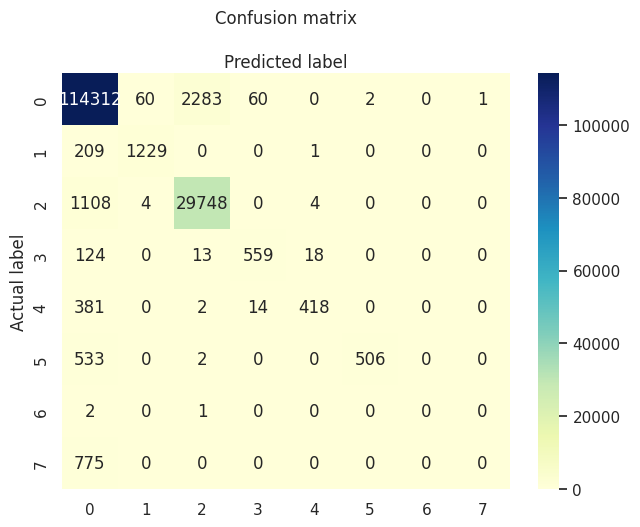

In [ ]:
## Visualizing the Confusion matrix using Seaborn Heatmap
class_names=['BENIGN','SSH-Patator','FTP-Patator','DoS Hulk','DoS GoldenEye','DoS Slowhttptest','DoS slowloris','Heartbleed'] # name  of classes
fig, ax = plt.subplots()
tick_marks = range(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Performance Metrics**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision (micro):", precision_score(y_test, y_pred, average = "micro"))
print("Precision (macro):", precision_score(y_test, y_pred, average = "macro"))
print("Recall (micro):", recall_score(y_test, y_pred, average = "micro"))
print("Recall (macro):", recall_score(y_test, y_pred, average = "micro"))

Accuracy: 0.9632668062401144
Precision (micro): 0.9632668062401144


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (macro): 0.7098804411988826
Recall (micro): 0.9632668062401144
Recall (macro): 0.9632668062401144


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv  # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report

**Finding best parameters**

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [
    {"criterion": ["gini"],"n_estimators": [50,100,150]},
    {"criterion": ["entropy"],"n_estimators": [50,100,150]},
]

scores = ["precision", "recall"]

In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = HalvingGridSearchCV(RandomForestClassifier(), tuned_parameters, scoring="%s_macro" % score, cv = 5, resource = 'n_samples', factor = 3)
    # clf = GridSearchCV(SVC(), tuned_parameters, scoring= "%s_macro" % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters set found on development set:

{'criterion': 'entropy', 'n_estimators': 150}

Grid scores on development set:

0.997 (+/-0.002) for {'criterion': 'gini', 'n_estimators': 50}
0.997 (+/-0.003) for {'criterion': 'gini', 'n_estimators': 100}
0.998 (+/-0.003) for {'criterion': 'gini', 'n_estimators': 150}
0.997 (+/-0.002) for {'criterion': 'entropy', 'n_estimators': 50}
0.973 (+/-0.101) for {'criterion': 'entropy', 'n_estimators': 100}
0.998 (+/-0.002) for {'criterion': 'entropy', 'n_estimators': 150}
0.998 (+/-0.001) for {'criterion': 'gini', 'n_estimators': 150}
0.998 (+/-0.001) for {'criterion': 'entropy', 'n_estimators': 150}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

                  precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00    116718
   DoS GoldenEye       1.00      1.00      1.00      1439
        DoS Hulk       1.00      1.00  

Best parameters are: criterion = entropy, n_estimators = 100 based on Recall. Recall is chosen as we want the true positive rate to be as highest as possible.

In [ ]:
clfRF = RandomForestClassifier(n_estimators = 100, criterion='entropy')

In [ ]:
clfRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred_RF=clfRF.predict(X_test)

**Confusion Matrix**

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_RF)
cnf_matrix

array([[116637,      1,     77,      3,      0,      0,      0,      0],
       [     2,   1434,      2,      1,      0,      0,      0,      0],
       [    18,      1,  30845,      0,      0,      0,      0,      0],
       [     3,      0,      0,    708,      3,      0,      0,      0],
       [     2,      0,      1,      0,    812,      0,      0,      0],
       [     0,      0,      0,      0,      0,   1041,      0,      0],
       [     1,      0,      0,      0,      0,      0,      2,      0],
       [     1,      0,      0,      0,      0,      0,      0,    774]])

Text(0.5, 427.9555555555555, 'Predicted label')

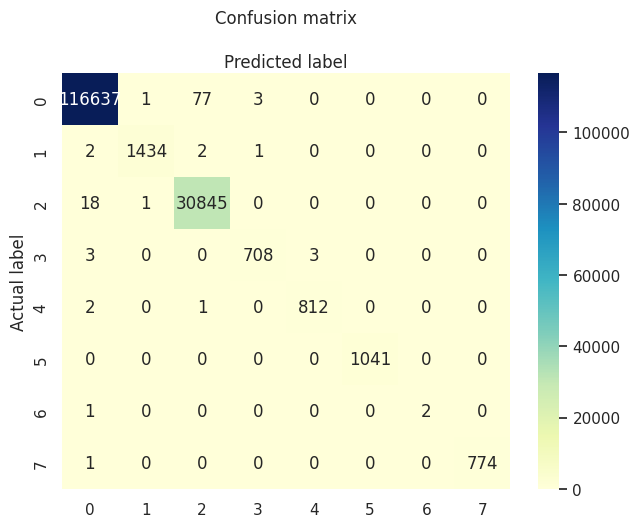

In [ ]:
## Visualizing the Confusion matrix using Seaborn Heatmap
class_names=['BENIGN','SSH-Patator','FTP-Patator','DoS Hulk','DoS GoldenEye','DoS Slowhttptest','DoS slowloris','Heartbleed'] # name  of classes
fig, ax = plt.subplots()
tick_marks = range(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Performance metrics**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))
print("Precision (micro):", precision_score(y_test, y_pred_RF, average = "micro"))
print("Precision (macro):", precision_score(y_test, y_pred_RF, average = "macro"))
print("Recall (micro):", recall_score(y_test, y_pred_RF, average = "micro"))
print("Recall (macro):", recall_score(y_test, y_pred_RF, average = "micro"))

Accuracy: 0.9992386902847692
Precision (micro): 0.9992386902847692
Precision (macro): 0.9983112431944738
Recall (micro): 0.9992386902847692
Recall (macro): 0.9992386902847692


**ROC Curve**

In [ ]:
y_test_dummy = pd.get_dummies(y_test, drop_first=False).values
y_pred_dummyRF = pd.get_dummies(y_pred_RF, drop_first=False).values

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [ ]:
from scipy import interp
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other

n_classes = 8 # number of class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummy[:, i], y_pred_dummyRF[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_dummy.ravel(), y_pred_dummyRF.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-138-979d11216779>:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


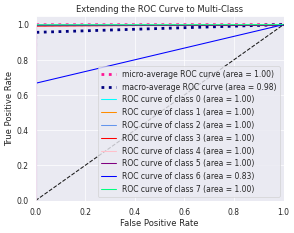

In [ ]:
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(dpi=50)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'pink', 'purple', 'blue', 'springgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()

# **Support Vector Classification**

**Tuning hyperparameters**

Taking a small sample from the whole dataframe to tune the hyperparameters. We tried using the whole dataframe but it was too large and required computational resources that we do not possess.

In [ ]:
## Splitting the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.75, stratify=y)

In [ ]:
c_ytrain=Counter(y_train)
c_ytrain

Counter({'DoS Hulk': 35805,
         'BENIGN': 140677,
         'DoS Slowhttptest': 857,
         'SSH-Patator': 988,
         'FTP-Patator': 1329,
         'DoS slowloris': 903,
         'DoS GoldenEye': 1604,
         'Heartbleed': 2})

In [ ]:
c_ytest=Counter(y_test)
c_ytest

Counter({'BENIGN': 422034,
         'SSH-Patator': 2963,
         'DoS Hulk': 107416,
         'DoS GoldenEye': 4812,
         'FTP-Patator': 3988,
         'DoS slowloris': 2708,
         'DoS Slowhttptest': 2570,
         'Heartbleed': 6})

In [ ]:
from sklearn.svm import SVC

Only recall is used as score as true positives want to be maximized for all classes

In [ ]:
tuned_parameters = [
    {"kernel": ["rbf"], "C": [1, 10, 100]},
]

scores = ["recall"]

In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clfSVC= HalvingGridSearchCV(SVC(), tuned_parameters, scoring= "%s_macro" % score, resource = 'n_samples', cv=2)
    clfSVC.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clfSVC.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clfSVC.cv_results_["mean_test_score"]
    stds = clfSVC.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clfSVC.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred_SVC = y_test, clfSVC.predict(X_test)
    print(classification_report(y_true, y_pred_SVC))
    print()

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.540 (+/-0.009) for {'C': 1, 'kernel': 'rbf'}
0.681 (+/-0.023) for {'C': 10, 'kernel': 'rbf'}
0.809 (+/-0.007) for {'C': 100, 'kernel': 'rbf'}
0.831 (+/-0.113) for {'C': 100, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

                  precision    recall  f1-score   support

          BENIGN       0.99      0.98      0.99    422034
   DoS GoldenEye       0.99      0.96      0.97      4812
        DoS Hulk       0.94      1.00      0.97    107416
DoS Slowhttptest       0.94      0.95      0.95      2570
   DoS slowloris       0.98      0.87      0.92      2708
     FTP-Patator       0.94      0.99      0.96      3988
      Heartbleed       1.00      0.83      0.91         6
     SSH-Patator       1.00      0.49      0.66      2963


**Building the SVC model**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(normalized_data,y,test_size=0.20,random_state=0) #0.20 chosen 

In [ ]:
model_svc=SVC(kernel='rbf', C=100) #best parameters...C= (value).... This one while take a while

In [ ]:
model_svc.fit(X_train, y_train)

SVC(C=100)

In [ ]:
y_pred_SVC2=model_svc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_SVC2))
print()
#screenshot for report report

                  precision    recall  f1-score   support

          BENIGN       1.00      0.99      0.99    112544
   DoS GoldenEye       0.99      0.96      0.98      1312
        DoS Hulk       0.96      1.00      0.98     28624
DoS Slowhttptest       0.94      0.98      0.96       696
   DoS slowloris       0.96      0.96      0.96       731
     FTP-Patator       0.95      0.98      0.97      1056
      Heartbleed       1.00      0.67      0.80         3
     SSH-Patator       0.99      0.47      0.64       767

        accuracy                           0.99    145733
       macro avg       0.97      0.88      0.91    145733
    weighted avg       0.99      0.99      0.99    145733




**Confusion Matrix**

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_SVC2)
cnf_matrix
#screenshot this confusion matrix for report

array([[111214,     12,   1205,     40,     16,     53,      0,      4],
       [    44,   1266,      1,      1,      0,      0,      0,      0],
       [    19,      0,  28605,      0,      0,      0,      0,      0],
       [    10,      1,      0,    682,      3,      0,      0,      0],
       [    27,      0,      1,      2,    701,      0,      0,      0],
       [     6,      0,      2,      0,     11,   1037,      0,      0],
       [     1,      0,      0,      0,      0,      0,      2,      0],
       [   402,      0,      0,      0,      0,      1,      0,    364]])

Text(0.5, 427.9555555555555, 'Predicted\xa0label')

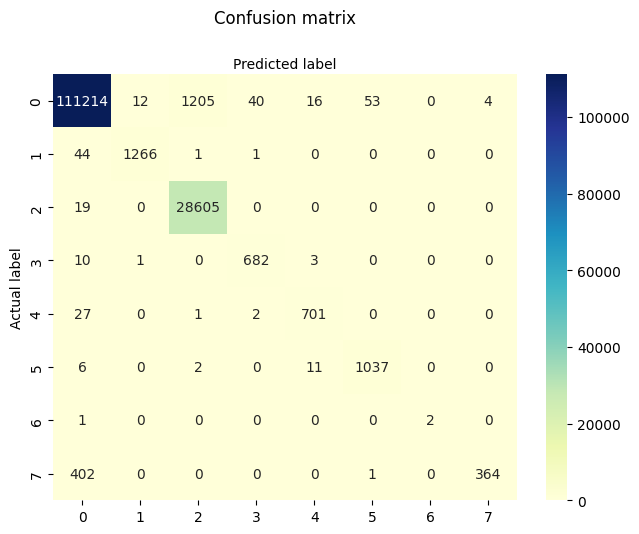

In [ ]:
#Seaborn Heatmap
class_names=['BENIGN','SSH-Patator','FTP-Patator','DoS Hulk','DoS GoldenEye','DoS Slowhttptest','DoS slowloris','Heartbleed'] # name  of classes
fig, ax = plt.subplots()
tick_marks = range(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Performance Metrics**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVC2))
print("Precision (micro):", precision_score(y_test, y_pred_SVC2, average = "micro"))
print("Precision (macro):", precision_score(y_test, y_pred_SVC2, average = "macro"))
print("Recall (micro):", recall_score(y_test, y_pred_SVC2, average = "micro"))
print("Recall (macro):", recall_score(y_test, y_pred_SVC2, average = "micro"))
#c/p into report

Accuracy: 0.9872232095681829
Precision (micro): 0.9872232095681829
Precision (macro): 0.9730016278447212
Recall (micro): 0.9872232095681829
Recall (macro): 0.9872232095681829


**ROC Curve**

In [ ]:
y_test_dummy = pd.get_dummies(y_test, drop_first=False).values
y_pred_dummySVC = pd.get_dummies(y_pred_SVC2, drop_first=False).values

In [ ]:
from scipy import interp
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other

n_classes = 8 # number of class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummy[:, i], y_pred_dummySVC[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_dummy.ravel(), y_pred_dummySVC.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-47-a0b6637f11a8>:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


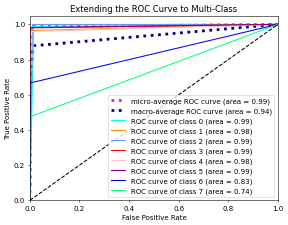

In [ ]:
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(dpi=50)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'pink', 'purple', 'blue', 'springgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()

#screen shot ROC Curve for report

# **Applying code on Test Data Provided**

In [ ]:
df_test = pd.read_csv("Cyberattack_Detection_Test.csv")
df_test

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443.0,61029065.0,14.0,13.0,1239.0,3587.0,911.0,0.0,88.500000,244.094480,...,9.0,20.0,75788.50000,61268.33706,200851.0,50567.0,10000000.0,5030.528428,10000000.0,9997094.0
1,53.0,193.0,2.0,2.0,90.0,158.0,45.0,45.0,45.000000,0.000000,...,1.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
2,443.0,327274.0,10.0,7.0,532.0,3548.0,195.0,0.0,53.200000,80.938660,...,4.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
3,80.0,108891.0,3.0,4.0,438.0,860.0,438.0,0.0,146.000000,252.879418,...,1.0,32.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
4,53.0,427.0,1.0,1.0,54.0,114.0,54.0,54.0,54.000000,0.000000,...,0.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123843,443.0,115407519.0,21.0,18.0,1088.0,4663.0,700.0,0.0,51.809524,157.933726,...,4.0,32.0,50585.18182,45761.43725,188560.0,36593.0,10000000.0,4572.337463,10000000.0,9999088.0
123844,80.0,150753.0,3.0,7.0,331.0,11595.0,331.0,0.0,110.333333,191.102939,...,1.0,32.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
123845,443.0,4243087.0,5.0,1.0,135.0,46.0,46.0,6.0,27.000000,20.124612,...,4.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
123846,443.0,117713460.0,17.0,17.0,837.0,15775.0,226.0,0.0,49.235294,76.994748,...,7.0,32.0,94325.50000,50092.15149,129746.0,58905.0,58800000.0,265476.169900,58900000.0,58600000.0


In [ ]:
df_test=df_test.drop(' Bwd PSH Flags',axis=1)
df_test=df_test.drop(' Fwd URG Flags',axis=1)
df_test=df_test.drop(' Bwd URG Flags',axis=1)
df_test=df_test.drop(' CWE Flag Count',axis=1)
df_test=df_test.drop('Fwd Avg Bytes/Bulk',axis=1)
df_test=df_test.drop(' Fwd Avg Packets/Bulk',axis=1)
df_test=df_test.drop(' Fwd Avg Bulk Rate',axis=1)
df_test=df_test.drop(' Bwd Avg Bytes/Bulk',axis=1)
df_test=df_test.drop(' Bwd Avg Packets/Bulk',axis=1)
df_test=df_test.drop('Bwd Avg Bulk Rate',axis=1)

We dropped the same columns that were dropped for the training data, to keep the dimension of the data set consistent.

In [ ]:
## Checking for NaN Values
nan_count = df_test.isna().sum().sum()
print(nan_count)

0


In [ ]:
# Only use if the number of Nan Values is >0
# df_test.dropna(inplace=True)

In [ ]:
## Cleaning data set
df_tclean=clean_dataset(df_test)

In [ ]:
## Scale the data using Min-Max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df_tclean = scaler.fit_transform(df_tclean)

**Predict target values using Random Forest**

In [ ]:
## Predicting y values for testing data DO NOT RUN THIS
y_hatRFtest=clfRF.predict(normalized_df_tclean)

In [ ]:
## Downloading y-values as csv DO NOT RUN THIS
y_csv=pd.DataFrame(y_hatRFtest)
y_csv.to_csv(r'PredictedYhat_RF.csv',index=False,header=True)

**Predict target values using SVC**

In [ ]:
y_hatSVCtest=model_svc.predict(normalized_df_tclean)

In [ ]:
## Downloading y-values as csv
y_csvSVC=pd.DataFrame(y_hatSVCtest)
y_csvSVC.to_csv(r'PredictedYhat_SVC.csv',index=False,header=True)